In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 

In [2]:
data = pd.read_csv('training.csv')

In [3]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
data.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [5]:
#First we should chek our target balance to know whether is balanced or not 
#we meake a new data frame to check it
disease_counts =data['prognosis'].value_counts()
temp_df = pd.DataFrame({
"Disease":disease_counts.index,
"Counts":disease_counts.values
})

In [6]:
null_columns = data.columns[data.isnull().any()]

# Print the names of columns with null values
for col in null_columns:
    print(col)
data = data.drop(data.columns[133], axis=1)


Unnamed: 133


C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Fungal infection'),
  Text(1, 0, 'Hepatitis C'),
  Text(2, 0, 'Hepatitis E'),
  Text(3, 0, 'Alcoholic hepatitis'),
  Text(4, 0, 'Tuberculosis'),
  Text(5, 0, 'Common Cold'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Dimorphic hemmorhoids(piles)'),
  Text(8, 0, 'Heart attack'),
  Text(9, 0, 'Varicose veins'),
  Text(10, 0, 'Hypothyroidism'),
  Text(11, 0, 'Hyperthyroidism'),
  Text(12, 0, 'Hypoglycemia'),
  Text(13, 0, 'Osteoarthristis'),
  Text(14, 0, 'Arthritis'),
  Text(15, 0, '(vertigo) Paroymsal  Positional Vertigo'),
  Text(16, 0, 'Acne'),
  Text(17, 0, 'Urinary tract infection'),
  Text(18, 0, 'Psoriasis'),
  Text(19, 0, 'Hepatitis D'),
  Text(20, 0, 'Hepatitis B'),
  Text(21, 0, 'Allergy'),
  Text(22, 0, 'hepatitis A'),
  Text(23, 0, 'GERD'),
  Text(24, 0, 'Chronic cholestasis'),

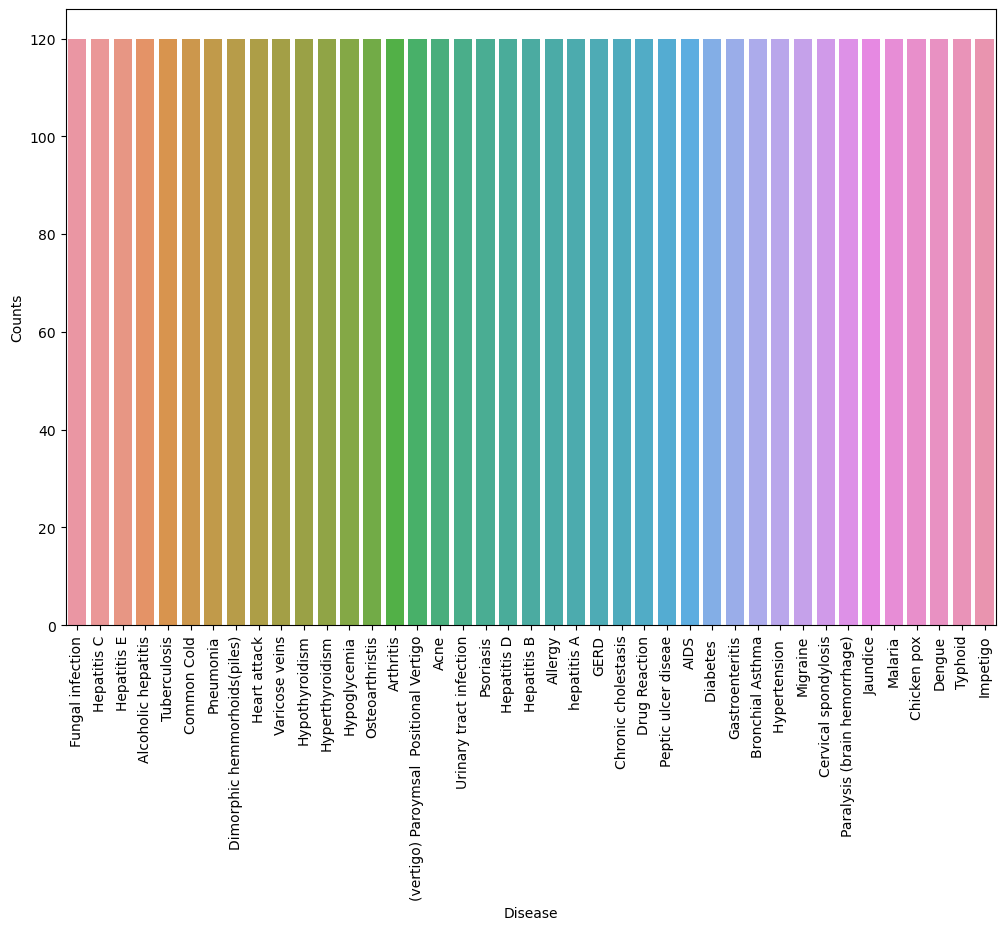

In [7]:
plt.figure(figsize=(12 , 8))
sns.barplot(x='Disease' , y="Counts" ,data  = temp_df)
plt.xticks(rotation=90)


In [8]:
LE = LabelEncoder()
data['numeric_prognosis'] =LE.fit_transform(data['prognosis'])
result = pd.concat([data['prognosis'], data['numeric_prognosis']], axis=1)
result

,prognosis,numeric_prognosis
0,Fungal infection,15
1,Fungal infection,15
2,Fungal infection,15
3,Fungal infection,15
4,Fungal infection,15
...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0
4916,Acne,2
4917,Urinary tract infection,38
4918,Psoriasis,35


In [9]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,numeric_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15


In [10]:
X = data.drop(columns=['prognosis'])
y = data['prognosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
print (f"Train:{X_train.shape}{y_train.shape}")
print (f"Test:{X_test.shape}{y_test.shape}")


Train:(3936, 133)(3936,)
Test:(984, 133)(984,)


In [12]:
#here we  define a function to to calculate our test feature with the accurance of our predicted X  .. by K-Fold 
def cv_scoring (estimator , X,y):
    return accuracy_score(y , estimator.predict(X))

In [13]:
#initializing our models 
models = {
    'SVC':SVC(),
    'GaussianNB':GaussianNB(),
    "Random forest":RandomForestClassifier(random_state=18)
}


In [14]:
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)#n_jobs using all CPUs , Cv number of K fold
    print(model_name)
    print(f"score:{scores}")
    print(f"mean score:{np.mean(scores)}")

SVC
score:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean score:1.0
GaussianNB
score:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean score:1.0
Random forest
score:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean score:1.0


 Accuracy of train data in SVM : 100.0
 Accuracy of test data in SVM : 100.0


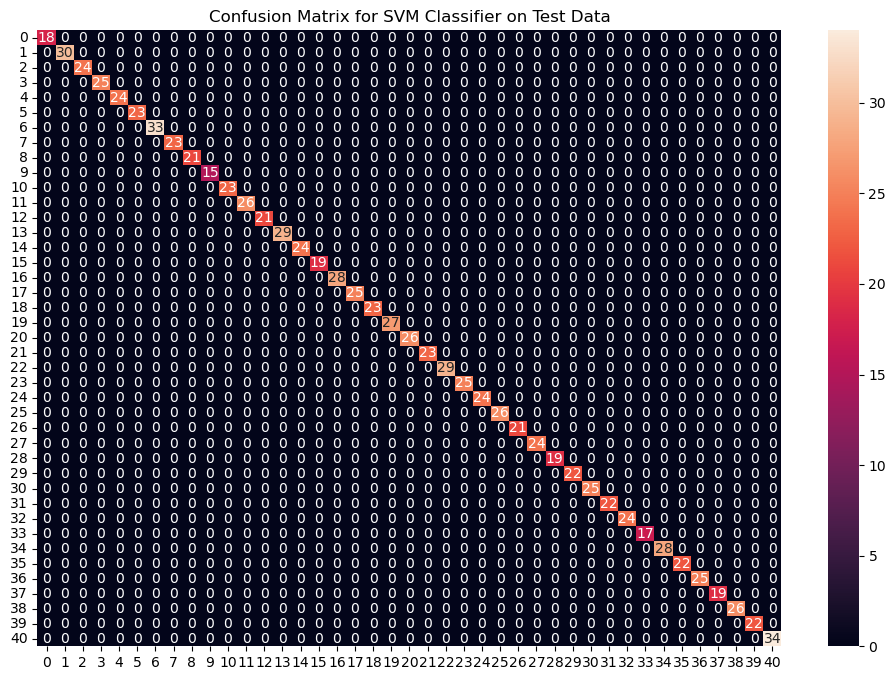

In [15]:
   #train ,Fit , predict ,Accuracy
svm_mdoel = SVC ()
svm_mdoel.fit(X_train , y_train)
preds = svm_mdoel.predict(X_test)
print(f" Accuracy of train data in SVM : {accuracy_score(y_train , svm_mdoel.predict(X_train))*100}")
print(f" Accuracy of test data in SVM : {accuracy_score(y_test , svm_mdoel.predict(X_test))*100}")
cf_matrix = confusion_matrix(y_test , preds)
plt.figure(figsize=(12 , 8))
sns.heatmap(cf_matrix ,annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

 Accuracy of train data in SVM : 100.0
 Accuracy of test data in SVM : 100.0


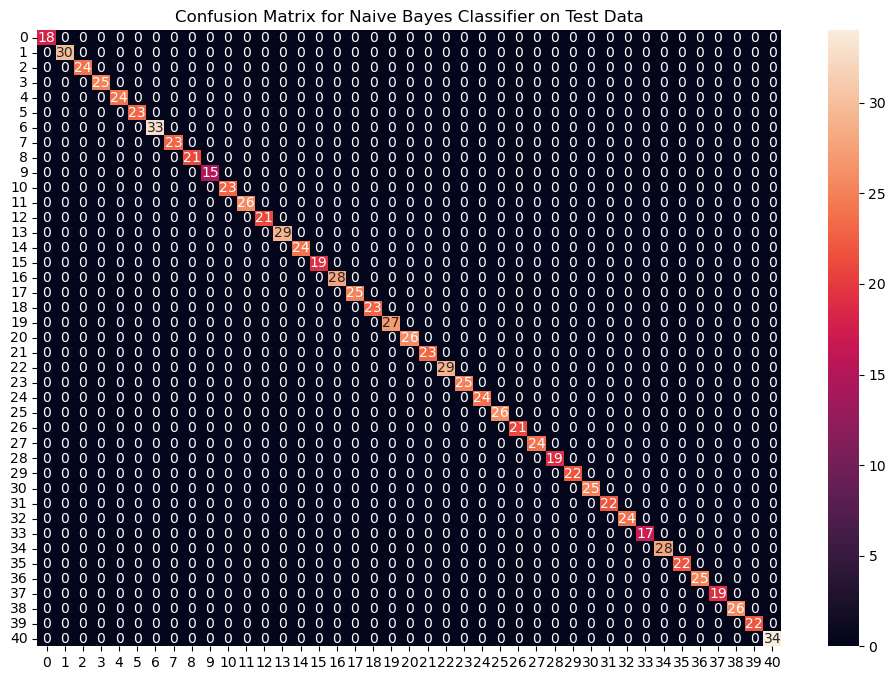

In [16]:
nb_model = GaussianNB()
nb_model.fit(X_train , y_train)
preds = nb_model.predict(X_test)
print(f" Accuracy of train data in SVM : {accuracy_score(y_train , nb_model.predict(X_train))*100}")
print(f" Accuracy of test data in SVM : {accuracy_score(y_test , nb_model.predict(X_test))*100}")
cf_matrix = confusion_matrix(y_test , preds)
plt.figure(figsize=(12 , 8))
sns.heatmap(cf_matrix ,annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

 Accuracy of train data in SVM : 100.0
 Accuracy of test data in SVM : 100.0


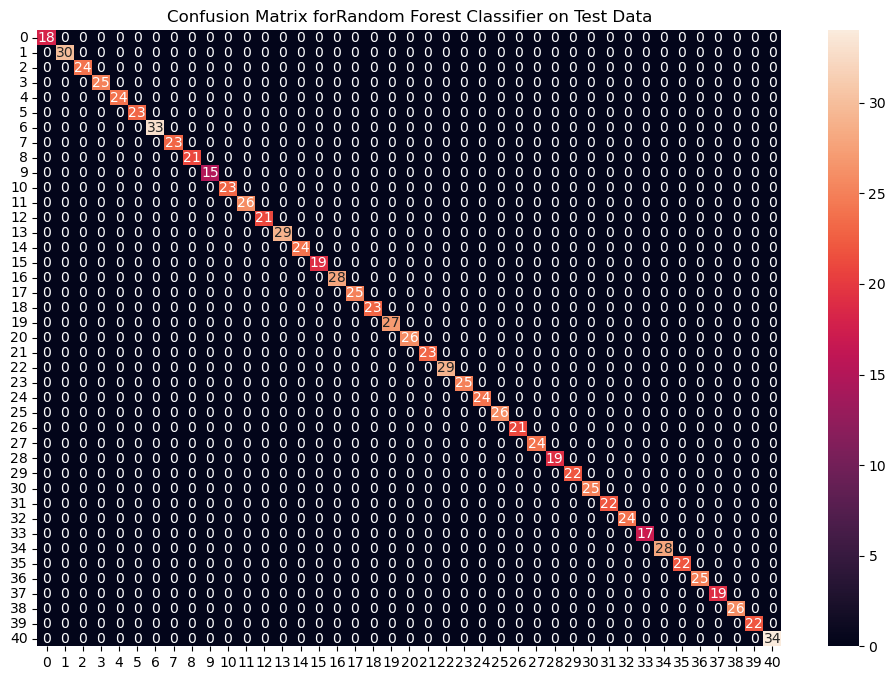

In [17]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train , y_train)
preds = rf_model.predict(X_test)
print(f" Accuracy of train data in SVM : {accuracy_score(y_train , rf_model.predict(X_train))*100}")
print(f" Accuracy of test data in SVM : {accuracy_score(y_test , rf_model.predict(X_test))*100}")
cf_matrix = confusion_matrix(y_test , preds)
plt.figure(figsize=(12 , 8))
sns.heatmap(cf_matrix ,annot=True)
plt.title("Confusion Matrix forRandom Forest Classifier on Test Data")
plt.show()

In [18]:
#now train all our whole data
# Training the models on whole data
final_svm_model = SVC()
final_svm_model.fit(X, y)
final_nb_model = GaussianNB()
final_nb_model.fit(X, y)
final_rf_model = RandomForestClassifier(random_state=18)
final_rf_model.fit(X, y)


RandomForestClassifier(random_state=18)

In [19]:
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [20]:
test_data['numeric_prognosis'] =LE.fit_transform(test_data['prognosis'])
result = pd.concat([test_data['prognosis'], test_data['numeric_prognosis']], axis=1)
result

,prognosis,numeric_prognosis
0,Fungal infection,15
1,Allergy,4
2,GERD,16
3,Chronic cholestasis,9
4,Drug Reaction,14
5,Peptic ulcer diseae,33
6,AIDS,1
7,Diabetes,12
8,Gastroenteritis,17
9,Bronchial Asthma,6


In [21]:
test_X = test_data.drop(columns=['prognosis'])
test_y = test_data['prognosis']

In [22]:
#we use voting method and use mode of all models prediction and combine them . better prediction 
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model .predict(test_X)
rf_preds = final_rf_model.predict(test_X)

In [23]:
from statistics import mode

# Combine predictions using majority voting
final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]


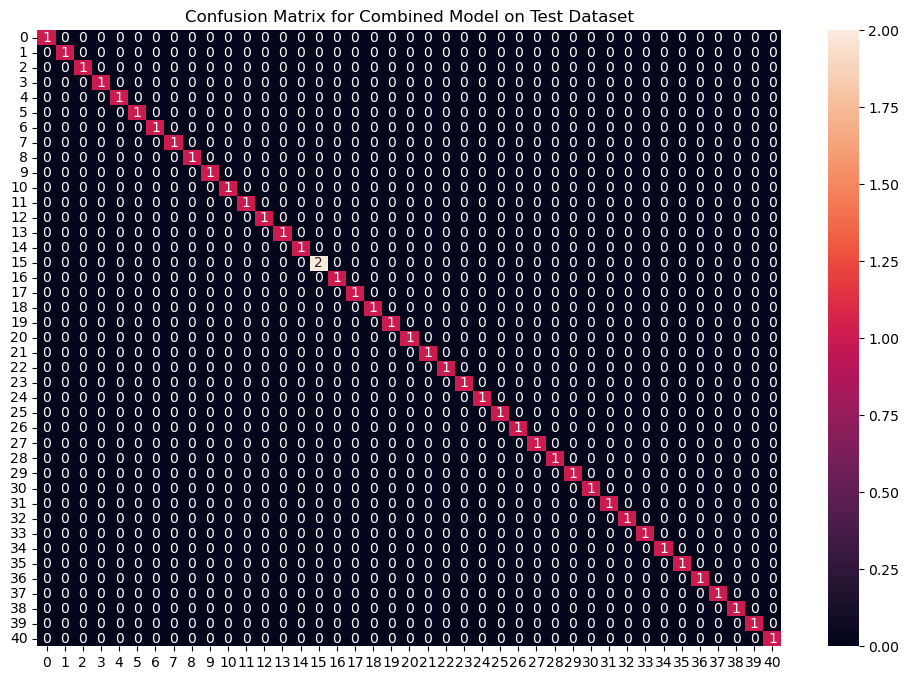

In [24]:
cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [26]:
#receiving symptoms and predict ilness
symptoms = X.columns.values
 
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index


In [27]:
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":LE.classes_
}
 

In [41]:
# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
     
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
         
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
     
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions
 


In [42]:
# Testing the function
#print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))